In [1]:
import numpy as np

f = 30e6
t = 1/f
five_sig_f = 1.25*f

four_sig = 6210 / 1e6 * 22000
five_sig = 233 / 1e6 * 22000

l_timeout = t*15000

avg_nyquist_time = 2**32/f/2
min_nyquist_time = 2**32/five_sig_f/2

print(f"min_nyquist_time: {min_nyquist_time}")
print(f"min_nyquist_time: {avg_nyquist_time*0.75}")

min_nyquist_time: 57.266230613333335
min_nyquist_time: 53.6870912


end time: 0.018326270903783946 , timeout length: 5.258209657432482e-05


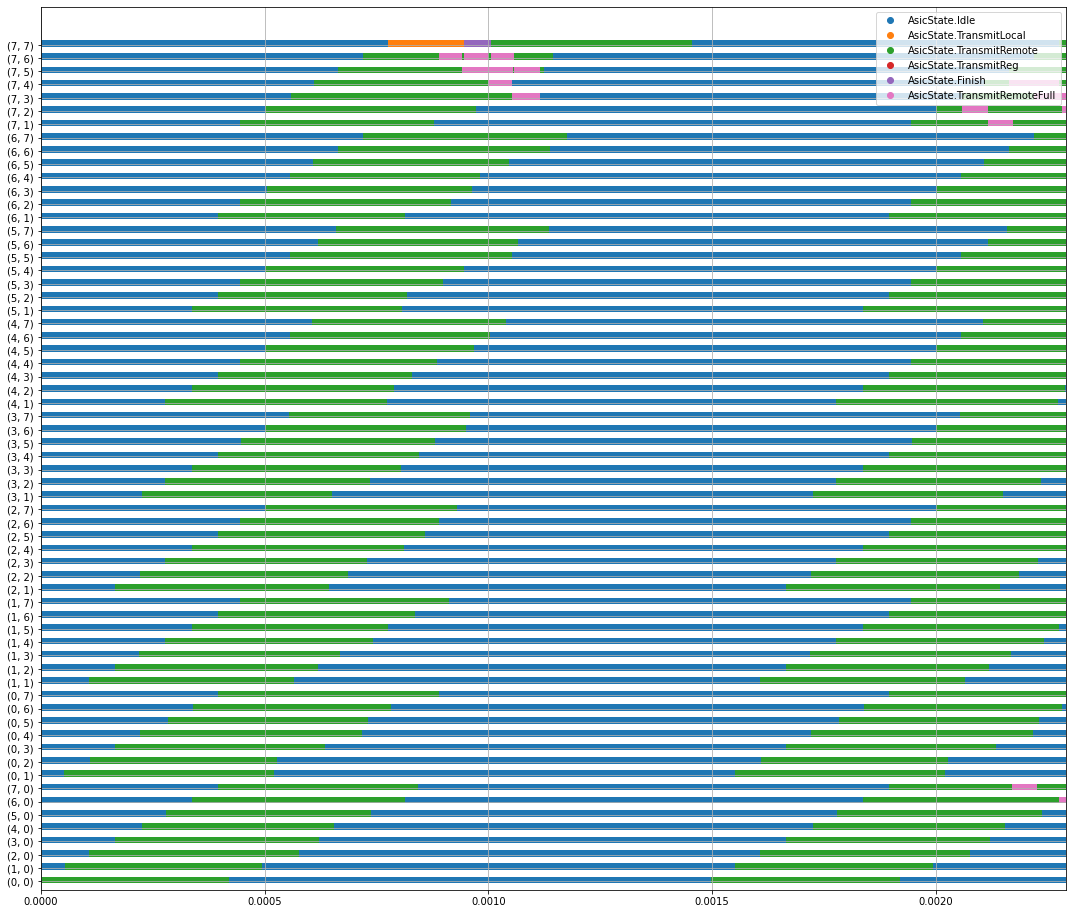

In [2]:
import QpixAsicArray as qparray
from QpixAsicArray import heatMap
from QpixAsic import QPByte, ProcQueue
import QpixAsic as qpasic
import random
import numpy as np
import matplotlib.pyplot as plt

TIMEOUT = 1700 * 8

qpa = qparray.QpixAsicArray(8, 8, debug=0.0, timeout=TIMEOUT, deltaT=1e-6)
route = "Left"
qpa.Route(route, transact=False)
r, c = qpa._nrows, qpa._ncols

hitTimes = [1e-10, 1e-9]
qpa[r-1][c-1].InjectHits(hitTimes)

dT = 0.0015
for i in range(r+c):
    qpa.Interrogate(dT)

nTicks = qpa[0][0].transferTicks
T = qpa[0][0].tOsc 
pT = nTicks * T * (r + c)
end = dT+pT*20
print("end time:", end, ", timeout length:", nTicks*T)
qparray.viewAsicState(qpa, time_end=end*0.125, ordering="left")

In [3]:
import numpy as np
print(0.975 ** 31)

0.4561871908223564


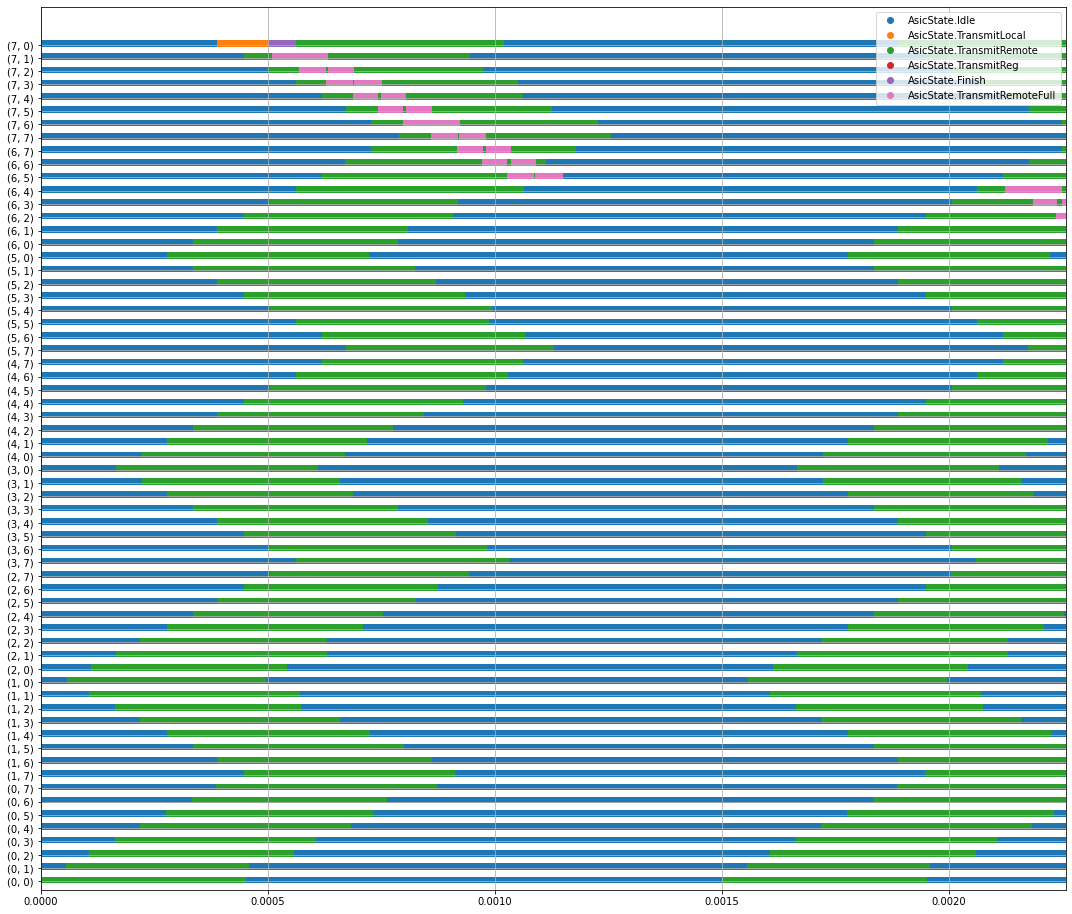

In [4]:
qpa = qparray.QpixAsicArray(8, 8, debug=0.0, timeout=TIMEOUT, deltaT=1e-6)
route = "Snake"
qpa.Route(route, transact=False)
r, c = qpa._nrows, qpa._ncols

dT = 1e-9
qpa[r-1][0].InjectHits([dT])

for i in range(r+c):
    qpa.Interrogate(0.0015)

nTicks = qpa[0][0].transferTicks
T = qpa[0][0].tOsc 
pT = nTicks * T * (r + c)
end = dT+pT*5
qparray.viewAsicState(qpa, time_end=end*0.5, ordering="snake")


In [5]:
if False:
    qpix_array = QpixAsicArray.QpixAsicArray(
                nrows=tRows, ncols=tCols, nPixs=nPix,
                fNominal=fNominal, pctSpread=pctSpread, deltaT=deltaT,
                timeEpsilon=timeEpsilon, timeout=timeout,
                hitsPerSec=hitsPerSec, debug=debug, tiledf=tiledf)

    rows, cols = qpix_array._nrows, qpix_array._ncols
    r = "Left"
    qpix_array.Route(r, transact=False)

    maxTime = 0
    for hit, asic in qpix_array:
        if len(hit) > 0:
            maxTime = np.max(hit) if maxTime < np.max(hit) else maxTime 
            nHits = np.random.randint(13)
            # asic.InjectHits(np.random.uniform(0,10,nHits))


    # attempt calibrate / interrogate procedure to reconstruct hit times
    calTime = 1
    nCals = 3
    for i in range(nCals):
        qpix_array.Calibrate(calTime)

    # make sure that there's nothing left in the buffers anywhere
    while True: 
        buffersEmpty = True
        for asic in qpix_array:
            if asic._localFifo._curSize > 0 or len(asic._times) > 0:
                buffersEmpty = False
            if asic._remoteFifo._curSize > 0:
                buffersEmpty = False
        if not buffersEmpty:
            qpix_array.Interrogate(0.01)
        else:
            break

    cal_words = [hit for hit in qpix_array._daqNode._localFifo._data if hit.wordType == AsicWord.REGRESP]
    end_words = [hit for hit in qpix_array._daqNode._localFifo._data if hit.wordType == AsicWord.EVTEND]

    fDaq = qpix_array._daqNode.fOsc
    for asic in qpix_array:
        r, c = asic.row, asic.col
        data = [data for data in cal_words if r == data.row and c == data.col]
        if len(data) > 1:
            fTrue = asic.fOsc
            fCalc =  [fDaq * (data[i+1].T() - data[i].T())/(data[i+1].daqT - data[i].daqT) for i in range(len(data)-1)]
            fDiff = [fTrue - calc for calc in fCalc]
            pDiff = np.mean(fDiff)/fTrue*100
            if abs(pDiff) > 1:
                print("bad pdiff: ", end="")
            print(f"({r},{c}): {pDiff:0.2e}")
        else:
            print(f"WARNING NOT ENOUGH cal times for ASIC ({r},{c})")


end time: 0.02078056749294133 , timeout length: 6.025177341544165e-05


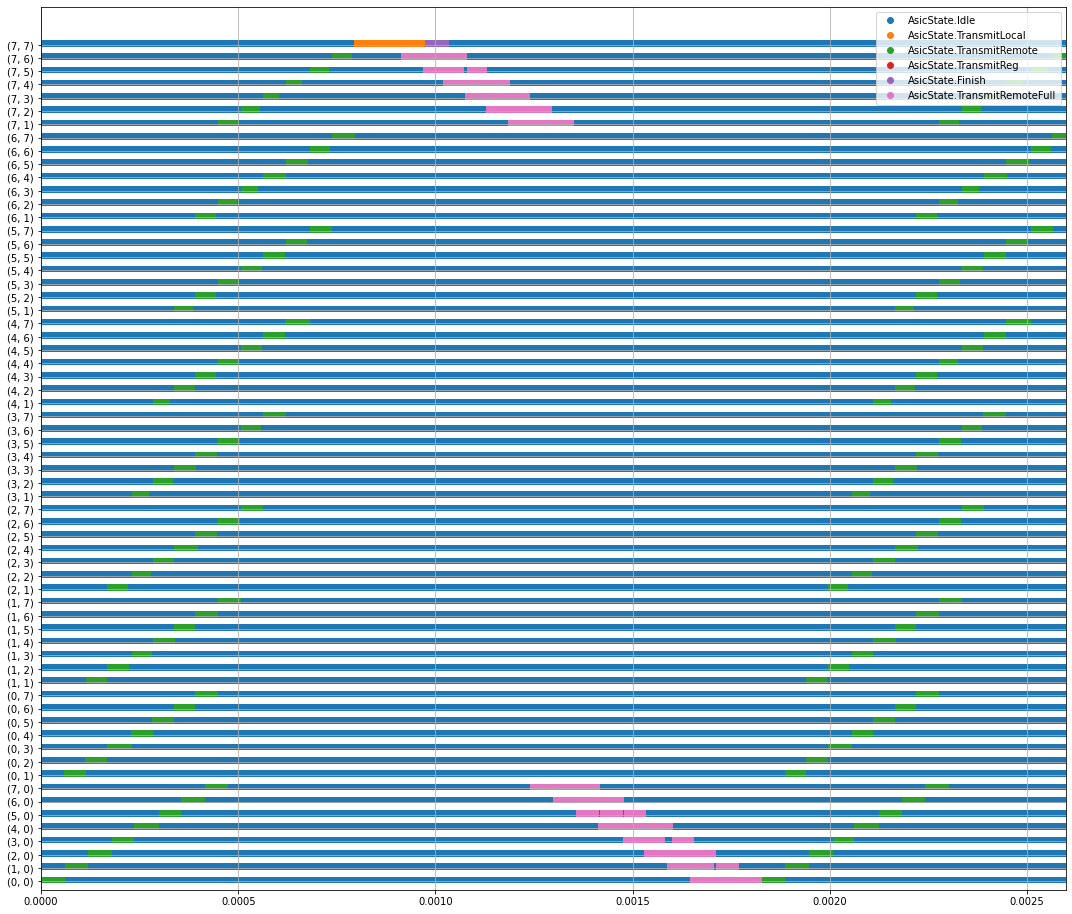

In [6]:
import QpixAsicArray as qparray
from QpixAsicArray import heatMap
from QpixAsic import QPByte, ProcQueue
import QpixAsic as qpasic
import random
import numpy as np
import matplotlib.pyplot as plt

TIMEOUT = 1700 * 8

qpa = qparray.QpixAsicArray(8, 8, debug=0.0, timeout=TIMEOUT, deltaT=1e-6)
route = "Left"
qpa.Route(route, transact=False)
qpa.SetSendRemote(enabled=True, transact=False)
r, c = qpa._nrows, qpa._ncols

hitTimes = [1e-10, 1e-9]
qpa[r-1][c-1].InjectHits(hitTimes)

dT = 0.0015
for i in range(r+c):
    qpa.Interrogate(dT)

nTicks = qpa[0][0].transferTicks
T = qpa[0][0].tOsc 
pT = nTicks * T * (r + c)
end = dT+pT*20
print("end time:", end, ", timeout length:", nTicks*T)
qparray.viewAsicState(qpa, time_end=end*0.125, ordering="left")

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from ast import literal_eval
import numpy as np

# pd = pd.read_csv("output_data/parameter_frame.csv")
# pd = pd.read_csv("output_data/output_df30.csv")
tile_df = pd.read_csv("output_df.csv")
daq_df = pd.read_csv("output_daq_df.csv")

Index(['Unnamed: 0', 'Route', 'Timeout', 'Int_period', 'nHardInt', 'AsicX',
       'AsicY', 'WordType', 'DaqTime', 'Timestamp', 'SimTime', 'channels'],
      dtype='object') 12
63        12034660
64        12034669
65        12034671
66        12034673
79        13294785
           ...    
44675     50224724
44677     76214292
44689     12705872
44701    118391320
44733    200378867
Name: Timestamp, Length: 9622, dtype: int64


<AxesSubplot:xlabel='DaqTime'>

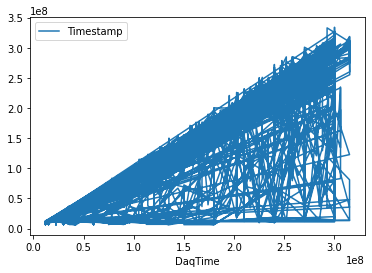

In [8]:
print(daq_df.columns, len(daq_df.columns))
daq_df = daq_df[daq_df["WordType"] == "AsicWord.DATA"]
print(daq_df["Timestamp"])
daq_df.plot(x='DaqTime', y='Timestamp')

min R1: 20.49512378094524


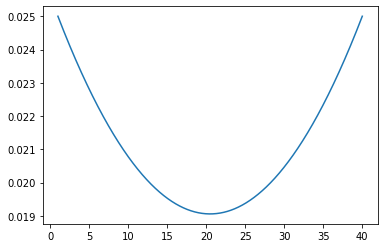

In [34]:
import matplotlib.pyplot as plt
import numpy as np

Ro = 40
Co = 40

def aw(R1,R=Ro,C=Co):
    R2 = R - R1
    return 1 / (2 * C * R**2) * (2*R1**2 + R**2 - 2*R*R1 + C*R + 2*R2)

x = np.linspace(1, Ro, Ro*100)
vals = [aw(xi) for xi in x]

plt.plot(x, vals)
print("min R1:", x[np.argmin(vals)])

In [32]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])